# Import Libraries
- Put all the important libraries together at the beginning to improve the readability, performance, and maintainability of the code

In [1]:
import pandas as pd # data processing, like pd.read_csv()
import numpy as np # linear algebra
import warnings# to make all the coding result more readable, ignnore the warning information
warnings.filterwarnings('ignore')
#import matplot and seaborn to draw the figures
import matplotlib.pyplot as plt
import seaborn as sns
# for the model split into train and test data, import train_test_spit
from sklearn.model_selection import train_test_split
# to scaler the attributes, import the StandardScaler to process
from sklearn.preprocessing import StandardScaler

# Get the Data

In [4]:
from pathlib import Path
diamond=pd.read_csv(Path('DiamondDataSet.csv'))# use .read_csv() method to get the whole data

# Exploratory data analysis

## Dataset Dimensions

In [5]:
diamond.shape # check the dataset, there are 10000 instances and 10 attributes

(10000, 10)

## Preview the dataset

In [6]:
diamond.head()

,carat,cut,colour,clarity,Length,Width,height,depth ratio,table,Grading
0,1.20,Very Good,H,SI2,6.74,6.77,4.25,62.9,56.0,Mid
1,0.60,Ideal,G,VVS2,5.37,5.41,3.31,61.4,59.0,Mid
2,0.23,Ideal,G,IF,3.93,3.96,2.48,62.8,55.0,Low
3,1.51,Very Good,D,VS2,7.29,7.34,4.56,62.3,59.0,High
4,1.01,Very Good,D,VVS2,6.51,6.57,3.94,60.2,58.0,High


## Rename the column names

In [7]:
# Unify lowercase column names and replace spaces with underscores
col_names=['carat','cut','colour','clarity','length','width','height','depth_ratio','table','grading']# store all the column names into one list
diamond.columns=col_names# use .columns to change
diamond.columns

Index(['carat', 'cut', 'colour', 'clarity', 'length', 'width', 'height',
       'depth_ratio', 'table', 'grading'],
      dtype='object')

## View summary of the dataset

In [8]:
diamond.info() # use the info() method check the data statistical information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        10000 non-null  float64
 1   cut          10000 non-null  object 
 2   colour       10000 non-null  object 
 3   clarity      10000 non-null  object 
 4   length       10000 non-null  float64
 5   width        10000 non-null  float64
 6   height       10000 non-null  float64
 7   depth_ratio  10000 non-null  float64
 8   table        10000 non-null  float64
 9   grading      10000 non-null  object 
dtypes: float64(6), object(4)
memory usage: 781.4+ KB


**Findings**
  - there are 10 columns, data size are 10000 colums, 6 numerical variables and 4 character variables 
  - 1) including 4C of diamond: "carat","cut","colour","clarity"
  - 2) 3 basic information of diamond: "length","width","height"
  - 3) 2 calculating columns: depth_ratio=height / mean (length, width), table=percentage of width of the top facet of the diamond to the width
  - 4) grading is the target variable

## View the statistical variables of dataset

In [9]:
diamond.describe()

,carat,length,width,height,depth_ratio,table
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.801591,5.738197,5.744263,3.545418,61.758790,57.453700
std,0.477550,1.131100,1.239754,0.753577,1.442807,2.243387
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000
25%,0.400000,4.720000,4.720000,2.910000,61.100000,56.000000
50%,0.700000,5.690000,5.710000,3.530000,61.900000,57.000000
75%,1.050000,6.550000,6.550000,4.040000,62.500000,59.000000
max,4.130000,10.140000,58.900000,31.800000,71.800000,95.000000


**Findings**
  - As for the statistical data values, their value ranges vary too much, need to standadize or normalize.
  - `width` and `height`'s max value have big deviation from 75% value

# Data Cleaning

## Check the missing values

In [10]:
diamond.isnull().any()
# result shows that there is no null value

carat          False
cut            False
colour         False
clarity        False
length         False
width          False
height         False
depth_ratio    False
table          False
grading        False
dtype: bool

## Check the duplicated Values

In [11]:
diamond.duplicated().sum()

10

**Findings**
  - There are 10 duplicated rows, next is to delete the duplicated rows

In [12]:
diamond.drop_duplicates(keep="first",inplace=True)
# keep the first row when 2 rows are same

In [13]:
diamond.describe()
# after cleaning the duplicated values, the whole dataset are 9990 rows

,carat,length,width,height,depth_ratio,table
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.801248,5.737596,5.743691,3.545053,61.758789,57.453453
std,0.476948,1.130515,1.239367,0.753271,1.442995,2.243914
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000
25%,0.400000,4.720000,4.720000,2.910000,61.100000,56.000000
50%,0.700000,5.690000,5.710000,3.530000,61.900000,57.000000
75%,1.050000,6.550000,6.550000,4.040000,62.500000,59.000000
max,4.130000,10.140000,58.900000,31.800000,71.800000,95.000000


**Result:**After cleaning all the duplicated rows, there are 9990 rows in the dataset.

# Explore the Categorical Variables

## Find Categorical Varibles

In [14]:
#use dtype to show all categorical variables
categorical = [col for col in diamond.columns if diamond[col].dtype=='O']# store all categories into 'categorical' list 
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 4 categorical variables

The categorical variables are :

 ['cut', 'colour', 'clarity', 'grading']


In [15]:
diamond[categorical].head()

,cut,colour,clarity,grading
0,Very Good,H,SI2,Mid
1,Ideal,G,VVS2,Mid
2,Ideal,G,IF,Low
3,Very Good,D,VS2,High
4,Very Good,D,VVS2,High


## Distribution of Categorical Variables

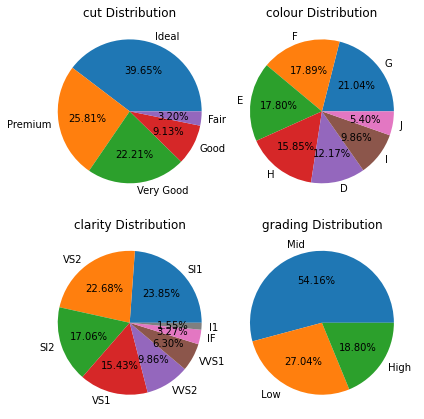

In [16]:
# To visualize the distribution of Categorical Variables, use pie chart to show it
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
axs = axs.ravel()

for i,category in enumerate(categorical):
    axs[i].pie(diamond[category].value_counts(), labels=diamond[category].value_counts().index.tolist(), autopct='%.2f%%')
    axs[i].set_title(f"{category} Distribution")
    axs[i].axis('equal')

plt.tight_layout()
plt.show()

**Finding**
  - **cut**: Largest proportion is `Ideal`, Least proportion is `Fair`
  - **colour**: Largest proportion is `G`, Least proportion is `J`
  - **clarity**: Largest proportion is `SI1`, Least proportion is `I1`
  - **grading**: Largest proportion is `Mid`, Least proportion is `High`

## Explore the `grading` Target Variable

In [17]:
# view number of unique values
diamond['grading'].unique()

array(['Mid  ', ' Low  ', 'High  '], dtype=object)

**Finding**
  - There are three unique values in the `grading` variable
  - `grading` columns contains the blank string, needs to delete all blanks for the later transfer.

In [18]:
# Grading have the blank space, it needed to be replaced before transformation.
diamond['grading'] = diamond['grading'].str.replace(" ", "")# replace all blank space

# Explore Numerical Variables

In [19]:
numerical=[col for col in diamond.columns if diamond[col].dtype!='O']
diamond[numerical].head() #preview the numerical variables

,carat,length,width,height,depth_ratio,table
0,1.20,6.74,6.77,4.25,62.9,56.0
1,0.60,5.37,5.41,3.31,61.4,59.0
2,0.23,3.93,3.96,2.48,62.8,55.0
3,1.51,7.29,7.34,4.56,62.3,59.0
4,1.01,6.51,6.57,3.94,60.2,58.0


## Visualize the Data Structure

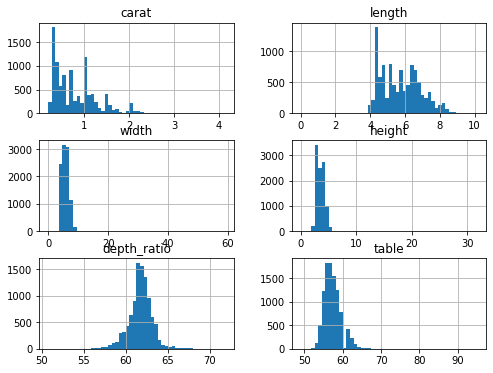

In [20]:
diamond.hist(bins=50, figsize=(8, 6))
plt.show()

**Finding**
   - `carat`: most diamonds are concentrated under 2.5 
   - `length`: the range varies from 4 to 8
   - `width`: the range varies from 5 to 10
   - `height`: the range varies from 3 to 6
   - `depth_ratio`: seems like normal distribution,the range from 55% to 70%
   - `table`: seems like normal distribution,the range from 50% to 70%

# Feature Engineering

## Process the Categorical Data
-  Because values of the categories are progressively related, therefore use ordinal encoding to process the values.

In [21]:
# use the progressive number to encode the categorical data
diamond['cut']=diamond['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
diamond['colour']=diamond['colour'].map({"J":1,"I":2,"H":3,"G":4,"F":5,"E":6,"D":7})
diamond['clarity']=diamond['clarity'].map({"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8})

In [22]:
diamond['grading']=diamond['grading'].map({'Low':1,'Mid':2,'High':3})

In [23]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9990 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        9990 non-null   float64
 1   cut          9990 non-null   int64  
 2   colour       9990 non-null   int64  
 3   clarity      9990 non-null   int64  
 4   length       9990 non-null   float64
 5   width        9990 non-null   float64
 6   height       9990 non-null   float64
 7   depth_ratio  9990 non-null   float64
 8   table        9990 non-null   float64
 9   grading      9990 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 858.5 KB


- After processing the categorical values, the diamond dataset are all numerical variables

## Check the Correlations of ALL Variables

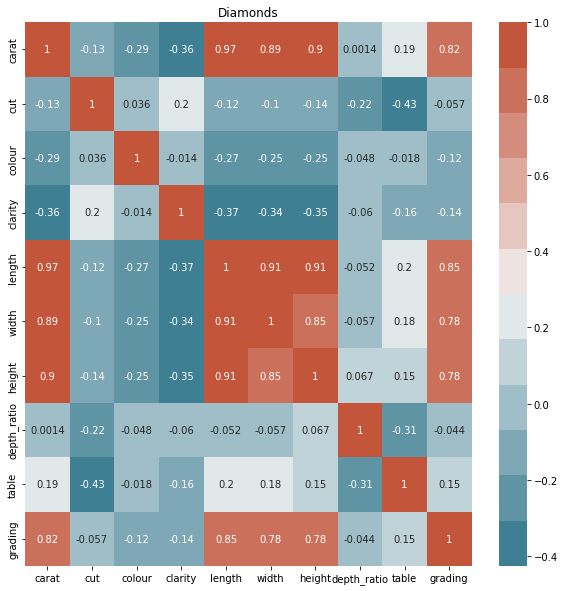

In [24]:
plt.figure(figsize=(10, 10))# define the figure size
df_corr = diamond.corr()# use the corr() method to calculate the correlations
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)# use the heatmap method to draw
plt.title("Diamonds")
plt.show() 

## Visualize the Correlationships

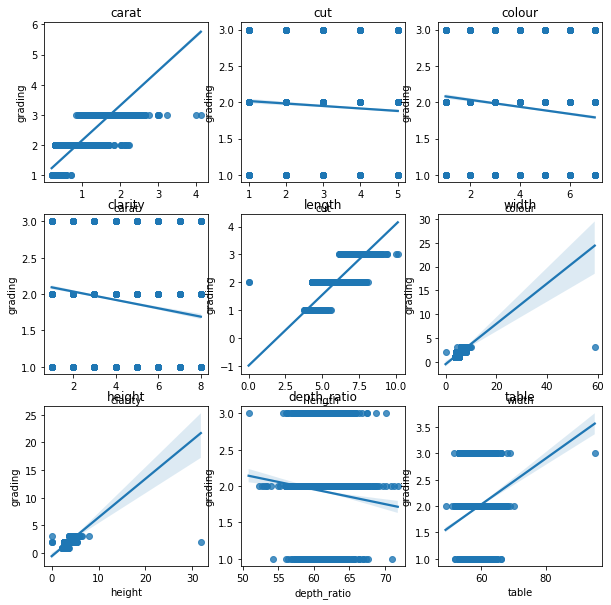

In [25]:
# create a figure with subplots for each attribute
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()
# loop over each attribute and create a scatter plot against grading
for i, col in enumerate(diamond.columns):
    if col != 'grading':
        ax = axes[i]
        sns.regplot(data=diamond, x=col, y='grading', ax=ax)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel('grading')
plt.show()

**Findings on corr() and visualization** 
   - **`grading`**: `length`, `carat`,`width`,`height` have strong positive relationships. `clarity` and `colour` have negative values
   -  `carat` are highly positively correlated with `(length, width, height)`, negatively related with `clarity`: -0.36
   - `cut` coefficient value with `table` is -0.43, `cut` has negative relations with `table`
   - `clarity` and `colour` has negative relationship with`carat`,`length`,`width`,`height`
   - `length` is highly positively correlated with `carat`, `width`, `height`,`grading`
   - `width` is highly positively correlated with `carat`,`length`, `height`,`grading`
   - `height` is  highly positively correlated with`carat`,`length`, `width`,`grading`
   - `depth_ratio` is negatively correlated with `table`
   - `table` is positively correlated with `cut`

# Model Preparation

In [26]:
# `grading` is the target value to become y value, and all other variables become X values
X=diamond.drop(['grading'],axis=1)# drop the target value
y=diamond['grading']

## Split the Data into training and test set

In [27]:
# use the train_test_split function to split the training data, define the test size is 20%, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [28]:
X_train.shape#After the data split, X_train data contains 9 columns and 7992 rows

(7992, 9)

## Feature Scaling

In [29]:
cols=X_train.columns# to store all X_train columns
sc = StandardScaler() # use the `StandardScaler() function to scale the features
X_train = sc.fit_transform(X_train) # use the fit_transform() method to apply X_train
X_test=sc.fit_transform(X_test)# X_test also need to be scaled

In [30]:
# after the train_test_split, X_train and X_test are np arrays
# for the later featuer selection process, transfer the X_train and X_test into DataFrame
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])

# Model Training
## Use 6 basic model with default values 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize the models
# define the random_state=42
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SGDClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier()
]

# Train and evaluate the models
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    #use the cross_val_score to calculate the scores
    # use k-10 folds to calculate
    model_scores=cross_val_score(model, X_train, y_train, cv=10)
    # Print the model's mean cross_val_score
    print(f'{model.__class__.__name__}: {model_scores.mean():.3f}')


LogisticRegression: 0.940
DecisionTreeClassifier: 0.927
RandomForestClassifier: 0.947
SGDClassifier: 0.926
SVC: 0.945
KNeighborsClassifier: 0.922


**Finding**
  - Depends on the cross validation scores, the best model is the RandomForest
  - Next I will continue to Optimise the model

# Model Optimisation Using RandomForest

## Use the Grid Model to Improve the Model

In [32]:
from sklearn.model_selection import GridSearchCV
import random

# Define the parameter grid for random forest
random_forest_params = {'n_estimators': range(50,150,50), 'max_depth': range(10, 20,2)}

# Create a GridSearchCV object for random forest
random_forest_gs = GridSearchCV(RandomForestClassifier(random_state=42), random_forest_params, cv=10)

# Fit the GridSearchCV object to the training data
random_forest_gs.fit(X_train, y_train)

# Print the best score and best parameters for random forest
print(f'Random Forest: Best score = {random_forest_gs.best_score_:.3f}, Best params = {random_forest_gs.best_params_}')

Random Forest: Best score = 0.948, Best params = {'max_depth': 16, 'n_estimators': 100}


**Finding**
   - Use the Grid Search, the Best score for Random Forest is 0.948,is better than the default score. the Best parameters are `max_depth` =16, `n_estimators`=100

- Use the Best Parameters {'max_depth': 16, 'n_estimators': 100} to build a Random Forest Model

In [33]:
model_rfc=RandomForestClassifier(n_estimators=100,max_depth=16,random_state=42)
model_rfc.fit(X_train, y_train)

model_scores=cross_val_score(model_rfc, X_train, y_train, cv=10)

print(f'{model_scores.mean():.3f}')

0.948


## Feature Importance

In [34]:
# view the feature scores
feature_scores = pd.Series(model_rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

length         0.234822
carat          0.227141
width          0.206093
height         0.131341
clarity        0.102736
colour         0.046909
depth_ratio    0.024026
table          0.015230
cut            0.011702
dtype: float64

**Finding**
   - `length` is the most important features
   - `cut` is the least important features

## Try PCA 

In [35]:
from sklearn.decomposition import PCA
pca=PCA()# import the PCA 
X_train_new=pca.fit_transform(X_train) # build a new X_train
model_rfc_pca=RandomForestClassifier(n_estimators=100,max_depth=18,random_state=42)# new model
model_rfc_pca.fit(X_train_new, y_train)# use the PCA analysis to train the model

model_scores_pca=cross_val_score(model_rfc_pca, X_train_new, y_train, cv=10)

print(model_scores_pca.mean())

0.9383130475594493


**Fiding**
- the model_scores.mean() is 0.938
- Use the PCA, the model score are lower than before

# Model Evaluation

## Confusion matrix

In [36]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(model_rfc, X_test, y_test, cv=10)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 523   25    0]
 [  47 1000   27]
 [   0   33  343]]


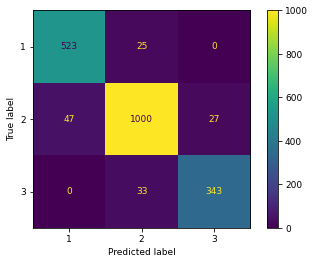

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Classification Report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))# use the classification_report to show the 

              precision    recall  f1-score   support

           1       0.92      0.95      0.94       548
           2       0.95      0.93      0.94      1074
           3       0.93      0.91      0.92       376

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998



**Result:** 
   - Base on the Confusion Matrix and Classification Report
   - Precision on 1 is 0.92, on 2 is 0.95, on 3 is 0.93: Precision is the proportion of true positives out of all predicted positives. High precision indicates that the model is correctly identifying positive cases.
   - Recall on 1 is 0.95, on 2 is 0.93, on 3 is 0.91: Recall is the proportion of true positives out of all actual positives. High recall indicates that the model is correctly identifying all positive cases.
   - F1 Score on 1 is 0.94, on 2 is 0.94, on 3 is 0.92: The F1 score is a weighted average of precision and recall. It ranges from 0 to 1, where 1 indicates perfect precision and recall.
   - Support on 1 is 548, on 2 is 1074, on 3 is 376:refers to the number of observations or samples that belong to each class. It is the number of true instances (positive and negative) in the corresponding class in the dataset.
   

# Predictions for Any New Values

- Finally, the model we train is the 
- To classify any new diamond in the three categories 

In [39]:
def get_input():
    carat = float(input("Enter carat weight of the diamond: "))
    cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
    cut = input("Enter the cut of the diamond (Fair, Good, Very Good, Premium, Ideal): ")
    cut_numeric = cut_map.get(cut)
    
    colour_map={'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
    colour = input("Enter the color of the diamond (D to J): ")
    colour_numeric=colour_map.get(colour)
    
    clarity_map={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
    clarity = input("Enter the clarity of the diamond (I1 to IF): ")
    clarity_numeric=clarity_map.get(clarity)
    dimensions = input("Enter the length, width, and depth of the diamond separated by commas: ")
    dimensions = [float(x.strip()) for x in dimensions.split(',')]
    depth_ratio = float(input("Enter the depth percentage of the diamond: "))
    table = float(input("Enter the table percentage of the diamond: "))
    return pd.DataFrame({'carat': [carat], 'cut': [cut_numeric], 'colour': [colour_numeric], 'clarity': [clarity_numeric], 'length': [dimensions[0]], 'width': [dimensions[1]], 'height': [dimensions[2]], 'depth_ratio': [depth_ratio],'table': [table]})

In [40]:
diamond_predict=model_rfc.predict(get_input())
predicted_labels = ['Low' if p == 1 else 'Mid' if p == 2 else 'High' for p in diamond_predict]
print(f"Diamond Grading is {predicted_labels}")

Enter carat weight of the diamond: 20
Enter the cut of the diamond (Fair, Good, Very Good, Premium, Ideal): Good
Enter the color of the diamond (D to J): J
Enter the clarity of the diamond (I1 to IF): I1
Enter the length, width, and depth of the diamond separated by commas: 10,20,30
Enter the depth percentage of the diamond: 50
Enter the table percentage of the diamond: 40
Diamond Grading is ['High']
